# KICKSTARTER - DATA ANALYSIS

### ❓Import libraries and load the dataset 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
ks_df = pd.read_csv("data/kickstarter.csv")

### ❓Run classic exploration method to know the size of the dataset, missing values, column names, etc ...

In [2]:
ks_df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
ks_df.shape

(378661, 15)

In [4]:
ks_df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [5]:
ks_df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [6]:
ks_df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

### ❓Have a look at the state repartition, can you express the share of each state as a % ? 

In [7]:
ks_df.state.value_counts(normalize=True)

failed        0.522153
successful    0.353762
canceled      0.102411
undefined     0.009407
live          0.007392
suspended     0.004875
Name: state, dtype: float64

### ❓Can you plot the last result with a pie chart ? (in french "Un camembert")

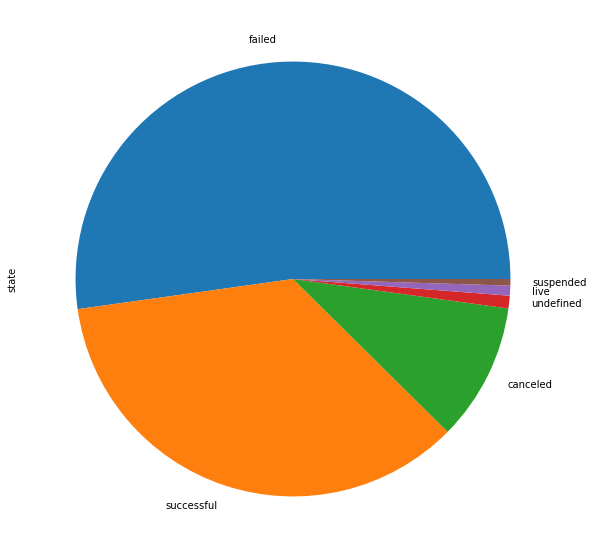

In [8]:
plt.figure(figsize=(15,10))
ks_df.state.value_counts().plot(kind="pie")

### ❓For the rest of the notebook we will focus only on projects that are either succesfull or failed. Recalculate your dataframe to take that into account

In [9]:
ks_df = ks_df[ks_df["state"].isin(['failed','successful'])]

### ❓How many different countries are in these projects ? How many different currencies are used ? 

In [10]:
ks_df.currency.unique()

array(['GBP', 'USD', 'CAD', 'AUD', 'NOK', 'EUR', 'MXN', 'SEK', 'NZD',
       'CHF', 'DKK', 'HKD', 'SGD', 'JPY'], dtype=object)

In [11]:
ks_df.country.unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'NL', 'LU', 'SG', 'N,0"',
       'JP'], dtype=object)

### ❓What's the country with the most project ? (and what % of share does it respresent)

In [12]:
ks_df.country.value_counts(normalize=True)

US      0.788000
GB      0.088804
CA      0.037296
AU      0.019947
DE      0.010360
FR      0.007598
NL      0.007269
IT      0.007143
ES      0.005647
SE      0.004550
MX      0.004254
NZ      0.003841
DK      0.002792
IE      0.002059
CH      0.001966
NO      0.001755
BE      0.001577
AT      0.001462
HK      0.001438
SG      0.001369
N,0"    0.000633
LU      0.000172
JP      0.000069
Name: country, dtype: float64

In [13]:
# nicer 😉
ks_df.country.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

US      78.8%
GB       8.9%
CA       3.7%
AU       2.0%
DE       1.0%
FR       0.8%
NL       0.7%
IT       0.7%
ES       0.6%
SE       0.5%
MX       0.4%
NZ       0.4%
DK       0.3%
IE       0.2%
CH       0.2%
NO       0.2%
BE       0.2%
AT       0.1%
HK       0.1%
SG       0.1%
N,0"     0.1%
LU       0.0%
JP       0.0%
Name: country, dtype: object

### ❓How many projects find themselves overachieving and gathering more money than needed ? Express it in a %

In [14]:
overachievers = ks_df[ks_df["pledged"] > ks_df["goal"]]
percentage = len(overachievers)*100/len(ks_df)
round(percentage,1)

39.2

### ❓Go further and analyze the state per categories, can you do a hue to run the analysis ? (we'll focus on categories with most projects)

In [15]:
ks_df.category.unique()
ks_df.category.value_counts().head(10)

Product Design    18680
Documentary       14523
Music             12633
Tabletop Games    11744
Shorts            11394
Food              10416
Video Games        9328
Film & Video       8624
Fiction            8108
Fashion            7529
Name: category, dtype: int64

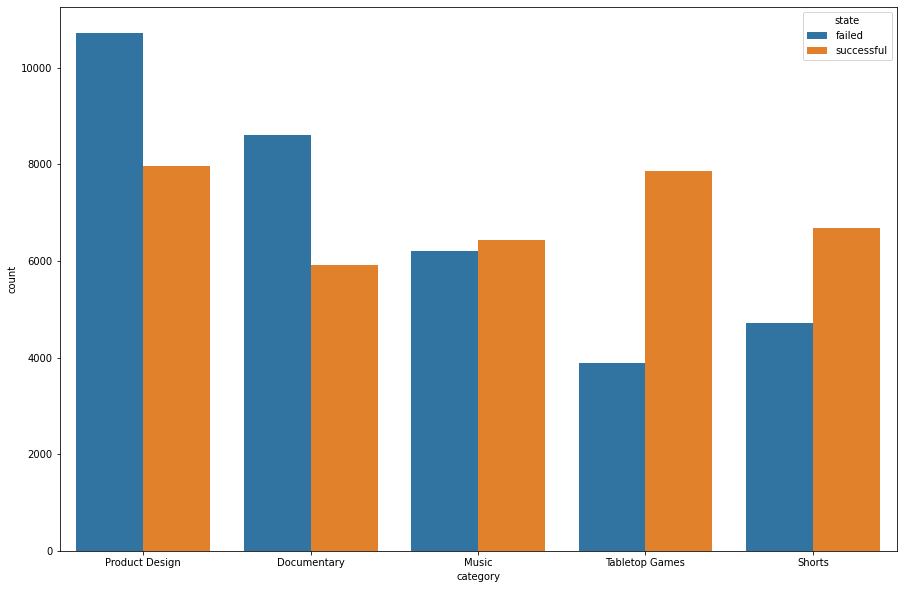

In [16]:
plt.figure(figsize=(15,10))
top5 = ks_df.category.value_counts().head(5).index
sns.countplot(data=ks_df, hue="state", x="category",order = top5)

### ❓Deepdive into the Top 3 main categories for Success and Top 3 main categories for Failure (in absolute values).

In [17]:
failed = ks_df[ks_df["state"] == "failed"]["main_category"].value_counts().head(3).index
successful = ks_df[ks_df["state"] == "successful"]["main_category"].value_counts().head(3).index

### ❓Let's look at the time of the projects. Let's transform the data stored in the 2 columns into data objects. Then let's just keep the day

In [18]:
ks_df['launched'] = pd.to_datetime(ks_df['launched'])
ks_df['launched_date'] = ks_df['launched'].dt.date

ks_df['deadline'] = pd.to_datetime(ks_df['deadline'])
ks_df['deadline_date'] = ks_df['deadline'].dt.date


### ❓We want to create a new column named "Campaign duration" that can express in number of days the time between the launch and the deadline

In [19]:
ks_df["campaign_duration"] = (ks_df['deadline_date'] - ks_df["launched_date"]).dt.days.astype(int)

### ❓Now that you have this insightful new columns you can start thinking : does the time of the campaign influence the success rate of the campaign ? 
Express the duration in months, and focus on campaigns that last one months or two)

In [20]:
ks_df["month_duration"] = (ks_df["campaign_duration"]/30).round(0)
two_months = ks_df[(ks_df['month_duration']< 2.1)&(ks_df['month_duration']> 0.1)]
ks_df.dtypes

ID                            int64
name                         object
category                     object
main_category                object
currency                     object
deadline             datetime64[ns]
goal                        float64
launched             datetime64[ns]
pledged                     float64
state                        object
backers                       int64
country                      object
usd pledged                 float64
usd_pledged_real            float64
usd_goal_real               float64
launched_date                object
deadline_date                object
campaign_duration             int64
month_duration              float64
dtype: object

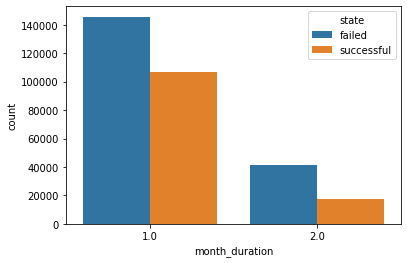

In [21]:
sns.countplot(data=two_months, x='month_duration', hue='state')

### ❓How has the number of projects evolved through the years ? Are there more projects now than before ? More successful ones ? 


In [22]:

#We need to categorize the data to see any change, we will group launches by months
ks_df['launch_month_year'] = ks_df['launched'].dt.to_period('M').astype(str)

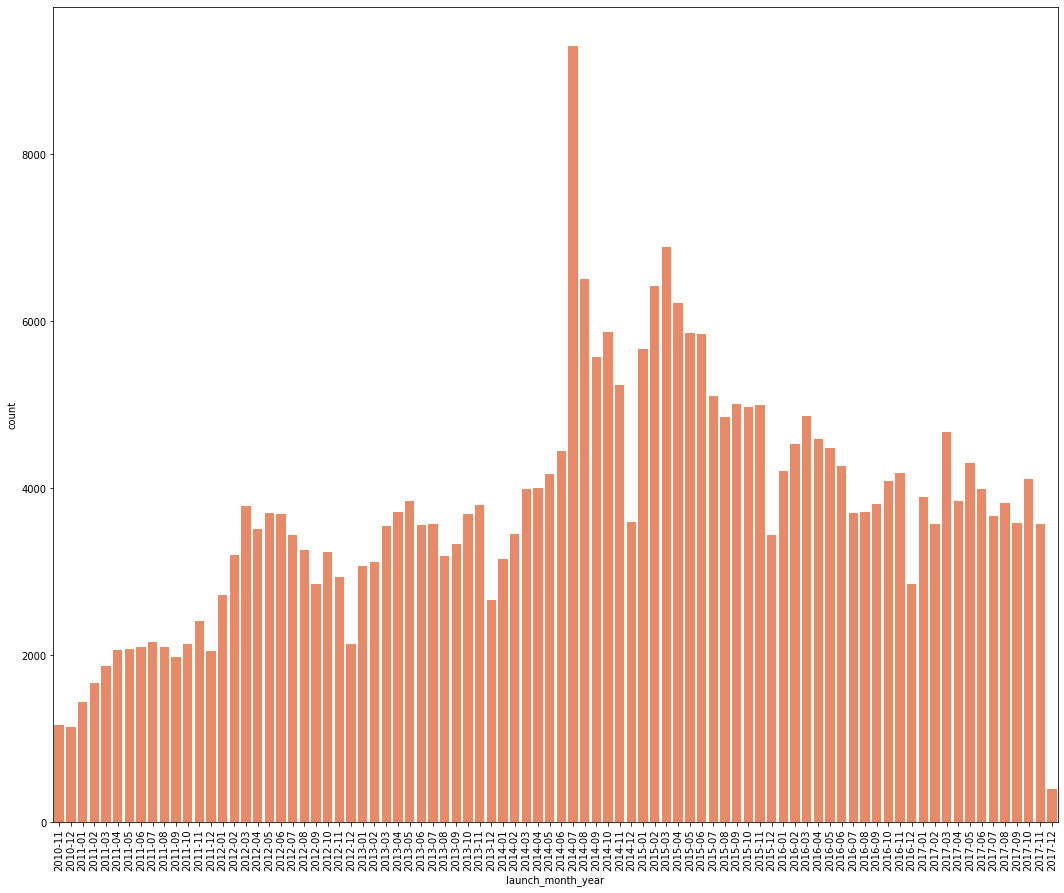

In [23]:
plt.figure(figsize = (18,15))
graph = sns.countplot(x="launch_month_year", data=ks_df, color='coral',
                   order=ks_df['launch_month_year'].value_counts().index.sort_values()[19:] )
graph.set_xticklabels(rotation=90,labels=graph.get_xticklabels())
plt.show()

### ❓We would like now to focus on an other column, the backers, that may well influence success or failure. Use violing plot to see the number of backers for failed and successful projects. Check also the number of backers per  categories. 
(violingplot is a feature given by seaborn)

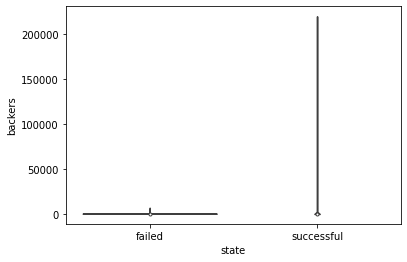

In [27]:
sns.violinplot(x='state',y='backers', data=ks_df)

This is not readable at all because there are some extreme values that kill the scale. There are two options in this situation : get rid of the odd data or change the scale. 

We already saw the first technique now we will focus on changing the scale. We will use a logarithmic scale. For this we need to use a new library **numpy**(on which pandas is built). 



In [26]:
ks_df['backers_log'] = np.log(ks_df['backers'] + 1 ) 

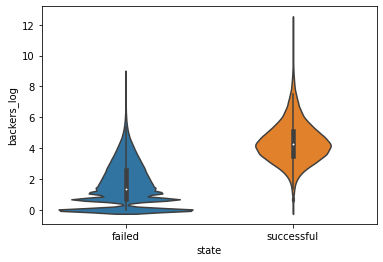

In [28]:
sns.violinplot(x='state',y='backers_log', data=ks_df)

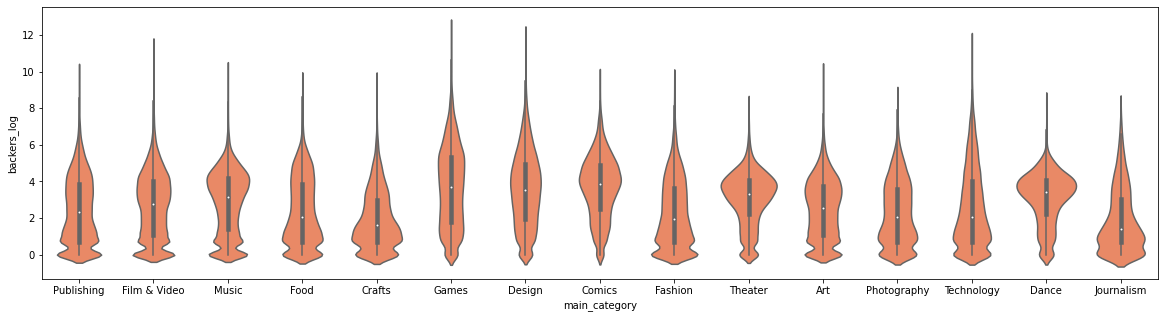

In [36]:
plt.figure(figsize = (20,5))
sns.violinplot(x='main_category',y='backers_log', 
                   color='coral', data=ks_df)